In [ ]:
from imutils import paths
from IPython.display import Image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
imagePaths = list(paths.list_images('/content/drive/MyDrive/Root Monitoring of Hydroponic Crop Plants/dataset'))

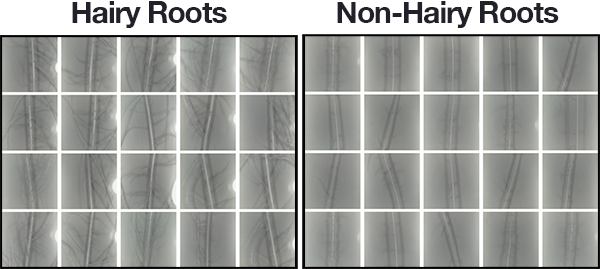

In [ ]:
Image(filename="/content/drive/MyDrive/Root Monitoring of Hydroponic Crop Plants/Images/dl_mm_dataset.png")

SVM BELOW

Accuracy: 0.9770491803278688
Precision: 0.9781061259706643
Recall: 0.9770491803278688
F1 Score: 0.9770630059741253
Support: None
                precision    recall  f1-score   support

    hairy_root       1.00      0.96      0.98       160
non_hairy_root       0.95      1.00      0.98       145

      accuracy                           0.98       305
     macro avg       0.98      0.98      0.98       305
  weighted avg       0.98      0.98      0.98       305



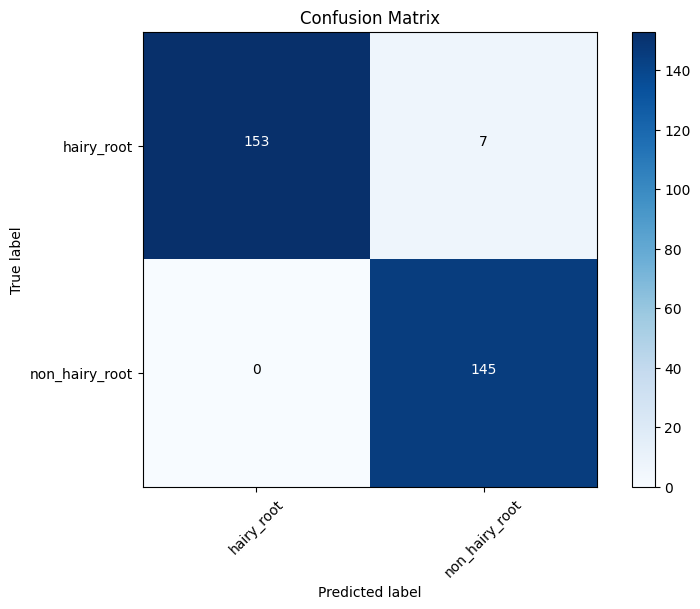

In [ ]:
# Import the necessary libraries
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn import svm, metrics
import itertools
from imutils import paths

# Define the path to the dataset
dataset_path = '/content/drive/MyDrive/Root Monitoring of Hydroponic Crop Plants/dataset'

# Load image paths
imagePaths = list(paths.list_images(dataset_path))

# Load the data
data = []
labels = []

# Process the 'hairy_root' and 'non_hairy_root' images
for img_path in imagePaths:
    data.append(img_path)
    label = os.path.basename(os.path.dirname(img_path))
    labels.append(label)

# Create a DataFrame
df = pd.DataFrame({'image_path': data, 'label': labels})

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define a function to load and preprocess the images
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.vgg16 import preprocess_input

def load_and_preprocess_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    img = preprocess_input(img)
    return img

# Load and preprocess images for training
X_train = np.array([load_and_preprocess_image(img_path) for img_path in train_df['image_path']])
y_train = train_df['label']

# Load and preprocess images for testing
X_test = np.array([load_and_preprocess_image(img_path) for img_path in test_df['image_path']])
y_test = test_df['label']

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train an SVM model
svm_classifier = SVC(kernel='linear', C=1, random_state=42)
svm_classifier.fit(X_train.reshape(X_train.shape[0], -1), y_train_encoded)

# Predict on the test set
y_pred = svm_classifier.predict(X_test.reshape(X_test.shape[0], -1))

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
precision, recall, f1_score, support = precision_recall_fscore_support(y_test_encoded, y_pred, average='weighted')

# Print the classification report
classification_rep = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Support:", support)
print(classification_rep)

# Visualize confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = metrics.confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = label_encoder.classes_
plot_confusion_matrix(y_test_encoded, y_pred, classes=class_names)


RANDOM FOREST BWLOW

Accuracy: 0.9540983606557377
Precision: 0.9554664546290187
Recall: 0.9540983606557377
F1 Score: 0.9541260074872134
Support: None
                precision    recall  f1-score   support

    hairy_root       0.98      0.93      0.96       160
non_hairy_root       0.93      0.98      0.95       145

      accuracy                           0.95       305
     macro avg       0.95      0.96      0.95       305
  weighted avg       0.96      0.95      0.95       305



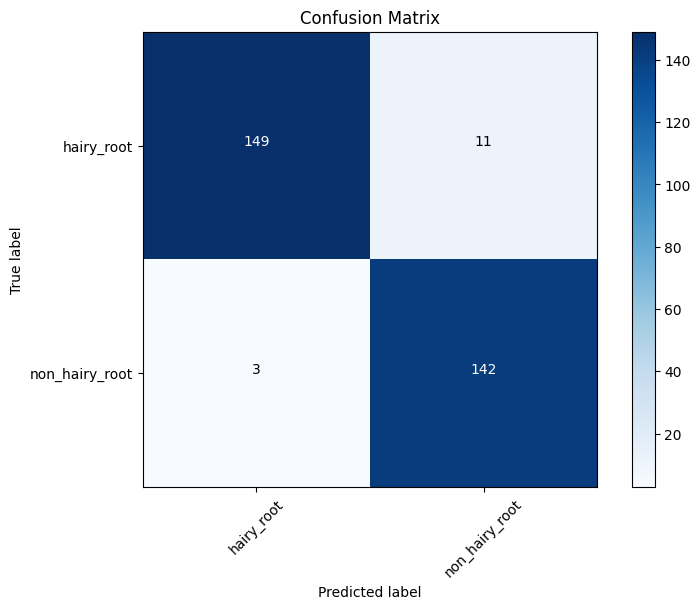

In [ ]:
# Import the necessary libraries
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import itertools
from imutils import paths

# Define the path to the dataset
dataset_path = '/content/drive/MyDrive/Root Monitoring of Hydroponic Crop Plants/dataset'

# Load image paths
imagePaths = list(paths.list_images(dataset_path))

# Load the data
data = []
labels = []

# Process the 'hairy_root' and 'non_hairy_root' images
for img_path in imagePaths:
    data.append(img_path)
    label = os.path.basename(os.path.dirname(img_path))
    labels.append(label)

# Create a DataFrame
df = pd.DataFrame({'image_path': data, 'label': labels})

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define a function to load and preprocess the images
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.vgg16 import preprocess_input

def load_and_preprocess_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    img = preprocess_input(img)
    return img

# Load and preprocess images for training
X_train = np.array([load_and_preprocess_image(img_path) for img_path in train_df['image_path']])
y_train = train_df['label']

# Load and preprocess images for testing
X_test = np.array([load_and_preprocess_image(img_path) for img_path in test_df['image_path']])
y_test = test_df['label']

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train a Random Forest model
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train.reshape(X_train.shape[0], -1), y_train_encoded)

# Predict on the test set
y_pred = random_forest_classifier.predict(X_test.reshape(X_test.shape[0], -1))

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
precision, recall, f1_score, support = precision_recall_fscore_support(y_test_encoded, y_pred, average='weighted')

# Print the classification report
classification_rep = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Support:", support)
print(classification_rep)

# Visualize confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = label_encoder.classes_
plot_confusion_matrix(y_test_encoded, y_pred, classes=class_names)


KNN

Accuracy: 0.8655737704918033
Precision: 0.8952053587167282
Recall: 0.8655737704918033
F1 Score: 0.8640220659724719
Support: None
                precision    recall  f1-score   support

    hairy_root       1.00      0.74      0.85       160
non_hairy_root       0.78      1.00      0.88       145

      accuracy                           0.87       305
     macro avg       0.89      0.87      0.86       305
  weighted avg       0.90      0.87      0.86       305



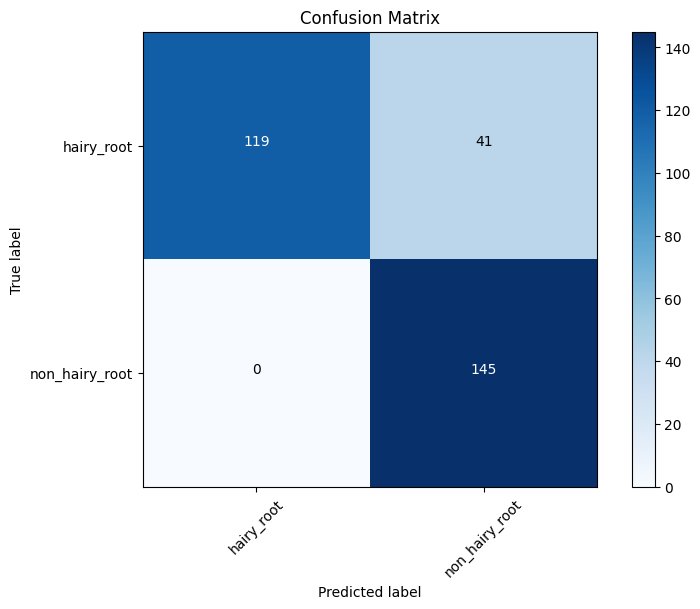

In [ ]:
# Import the necessary libraries
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import itertools
from imutils import paths

# Define the path to the dataset
dataset_path = '/content/drive/MyDrive/Root Monitoring of Hydroponic Crop Plants/dataset'

# Load image paths
imagePaths = list(paths.list_images(dataset_path))

# Load the data
data = []
labels = []

# Process the 'hairy_root' and 'non_hairy_root' images
for img_path in imagePaths:
    data.append(img_path)
    label = os.path.basename(os.path.dirname(img_path))
    labels.append(label)

# Create a DataFrame
df = pd.DataFrame({'image_path': data, 'label': labels})

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define a function to load and preprocess the images
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.vgg16 import preprocess_input

def load_and_preprocess_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    img = preprocess_input(img)
    return img

# Load and preprocess images for training
X_train = np.array([load_and_preprocess_image(img_path) for img_path in train_df['image_path']])
y_train = train_df['label']

# Load and preprocess images for testing
X_test = np.array([load_and_preprocess_image(img_path) for img_path in test_df['image_path']])
y_test = test_df['label']

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train a KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_classifier.fit(X_train.reshape(X_train.shape[0], -1), y_train_encoded)

# Predict on the test set
y_pred = knn_classifier.predict(X_test.reshape(X_test.shape[0], -1))

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
precision, recall, f1_score, support = precision_recall_fscore_support(y_test_encoded, y_pred, average='weighted')

# Print the classification report
classification_rep = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Support:", support)
print(classification_rep)

# Visualize confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = label_encoder.classes_
plot_confusion_matrix(y_test_encoded, y_pred, classes=class_names)


LOGISTIC REGRESSION



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.980327868852459
Precision: 0.9811095429377917
Recall: 0.980327868852459
F1 Score: 0.9803392982624475
Support: None
                precision    recall  f1-score   support

    hairy_root       1.00      0.96      0.98       160
non_hairy_root       0.96      1.00      0.98       145

      accuracy                           0.98       305
     macro avg       0.98      0.98      0.98       305
  weighted avg       0.98      0.98      0.98       305



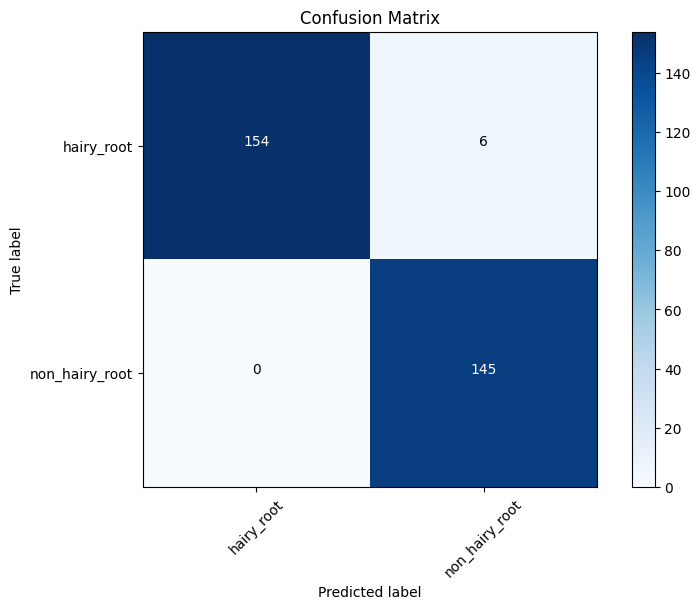

In [ ]:
# Import the necessary libraries
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import itertools
from imutils import paths

# Define the path to the dataset
dataset_path = '/content/drive/MyDrive/Root Monitoring of Hydroponic Crop Plants/dataset'

# Load image paths
imagePaths = list(paths.list_images(dataset_path))

# Load the data
data = []
labels = []

# Process the 'hairy_root' and 'non_hairy_root' images
for img_path in imagePaths:
    data.append(img_path)
    label = os.path.basename(os.path.dirname(img_path))
    labels.append(label)

# Create a DataFrame
df = pd.DataFrame({'image_path': data, 'label': labels})

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define a function to load and preprocess the images
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.vgg16 import preprocess_input

def load_and_preprocess_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    img = preprocess_input(img)
    return img

# Load and preprocess images for training
X_train = np.array([load_and_preprocess_image(img_path) for img_path in train_df['image_path']])
y_train = train_df['label']

# Load and preprocess images for testing
X_test = np.array([load_and_preprocess_image(img_path) for img_path in test_df['image_path']])
y_test = test_df['label']

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train a Logistic Regression model
logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(X_train.reshape(X_train.shape[0], -1), y_train_encoded)

# Predict on the test set
y_pred = logistic_regression_classifier.predict(X_test.reshape(X_test.shape[0], -1))

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
precision, recall, f1_score, support = precision_recall_fscore_support(y_test_encoded, y_pred, average='weighted')

# Print the classification report
classification_rep = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Support:", support)
print(classification_rep)

# Visualize confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = label_encoder.classes_
plot_confusion_matrix(y_test_encoded, y_pred, classes=class_names)


XG BOOST

Accuracy: 0.9639344262295082
Precision: 0.9649933456270054
Recall: 0.9639344262295082
F1 Score: 0.9639561522450538
Support: None
                precision    recall  f1-score   support

    hairy_root       0.99      0.94      0.96       160
non_hairy_root       0.94      0.99      0.96       145

      accuracy                           0.96       305
     macro avg       0.96      0.96      0.96       305
  weighted avg       0.96      0.96      0.96       305



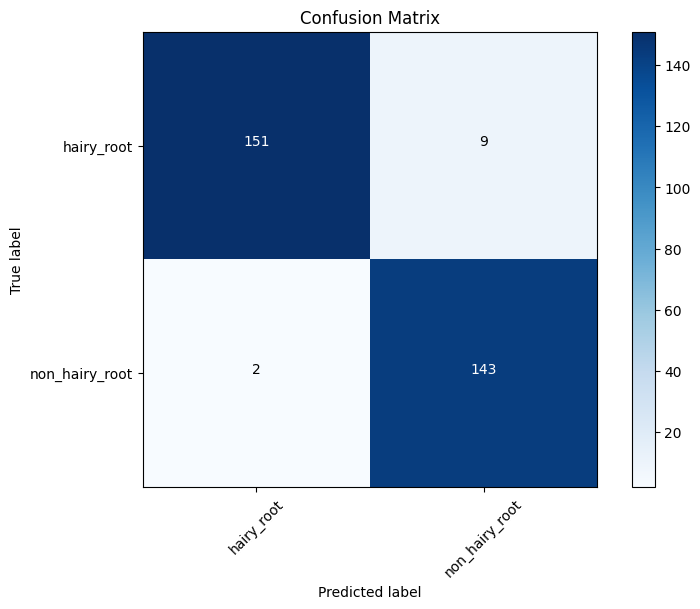

In [ ]:
# Import the necessary libraries
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import itertools
from imutils import paths
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.vgg16 import preprocess_input

# Define the path to the dataset
dataset_path = '/content/drive/MyDrive/Root Monitoring of Hydroponic Crop Plants/dataset'

# Load image paths
imagePaths = list(paths.list_images(dataset_path))

# Load the data
data = []
labels = []

# Process the 'hairy_root' and 'non_hairy_root' images
for img_path in imagePaths:
    data.append(img_path)
    label = os.path.basename(os.path.dirname(img_path))
    labels.append(label)

# Create a DataFrame
df = pd.DataFrame({'image_path': data, 'label': labels})

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define a function to load and preprocess the images
def load_and_preprocess_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    img = preprocess_input(img)
    return img

# Load and preprocess images for training
X_train = np.array([load_and_preprocess_image(img_path) for img_path in train_df['image_path']])
y_train = train_df['label']

# Load and preprocess images for testing
X_test = np.array([load_and_preprocess_image(img_path) for img_path in test_df['image_path']])
y_test = test_df['label']

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train an XGBoost model
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train.reshape(X_train.shape[0], -1), y_train_encoded)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test.reshape(X_test.shape[0], -1))

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
precision, recall, f1_score, support = precision_recall_fscore_support(y_test_encoded, y_pred, average='weighted')

# Print the classification report
classification_rep = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Support:", support)
print(classification_rep)

# Visualize confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = label_encoder.classes_
plot_confusion_matrix(y_test_encoded, y_pred, classes=class_names)


ADA BOOST


Accuracy: 0.9475409836065574
Precision: 0.9483353472062626
Recall: 0.9475409836065574
F1 Score: 0.9475714620331933
Support: None
                precision    recall  f1-score   support

    hairy_root       0.97      0.93      0.95       160
non_hairy_root       0.93      0.97      0.95       145

      accuracy                           0.95       305
     macro avg       0.95      0.95      0.95       305
  weighted avg       0.95      0.95      0.95       305



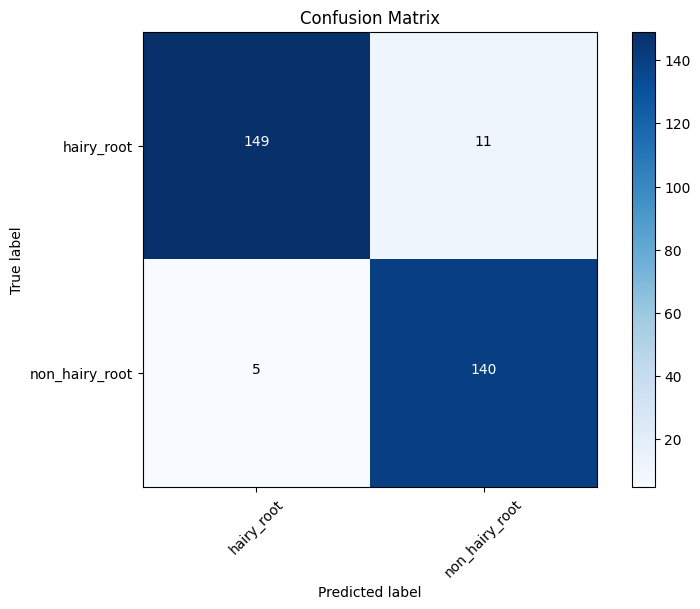

In [ ]:
# Import the necessary libraries
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import itertools
from imutils import paths
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.vgg16 import preprocess_input

# Define the path to the dataset
dataset_path = '/content/drive/MyDrive/Root Monitoring of Hydroponic Crop Plants/dataset'

# Load image paths
imagePaths = list(paths.list_images(dataset_path))

# Load the data
data = []
labels = []

# Process the 'hairy_root' and 'non_hairy_root' images
for img_path in imagePaths:
    data.append(img_path)
    label = os.path.basename(os.path.dirname(img_path))
    labels.append(label)

# Create a DataFrame
df = pd.DataFrame({'image_path': data, 'label': labels})

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define a function to load and preprocess the images
def load_and_preprocess_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    img = preprocess_input(img)
    return img

# Load and preprocess images for training
X_train = np.array([load_and_preprocess_image(img_path) for img_path in train_df['image_path']])
y_train = train_df['label']

# Load and preprocess images for testing
X_test = np.array([load_and_preprocess_image(img_path) for img_path in test_df['image_path']])
y_test = test_df['label']

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train an AdaBoost model
adaboost_classifier = AdaBoostClassifier(n_estimators=50)  # You can adjust the number of estimators
adaboost_classifier.fit(X_train.reshape(X_train.shape[0], -1), y_train_encoded)

# Predict on the test set
y_pred = adaboost_classifier.predict(X_test.reshape(X_test.shape[0], -1))

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
precision, recall, f1_score, support = precision_recall_fscore_support(y_test_encoded, y_pred, average='weighted')

# Print the classification report
classification_rep = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Support:", support)
print(classification_rep)

# Visualize confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = label_encoder.classes_
plot_confusion_matrix(y_test_encoded, y_pred, classes=class_names)


LDA


Accuracy: 0.9377049180327869
Precision: 0.9449220311875249
Recall: 0.9377049180327869
F1 Score: 0.9376540151499528
Support: None
                precision    recall  f1-score   support

    hairy_root       1.00      0.88      0.94       160
non_hairy_root       0.88      1.00      0.94       145

      accuracy                           0.94       305
     macro avg       0.94      0.94      0.94       305
  weighted avg       0.94      0.94      0.94       305



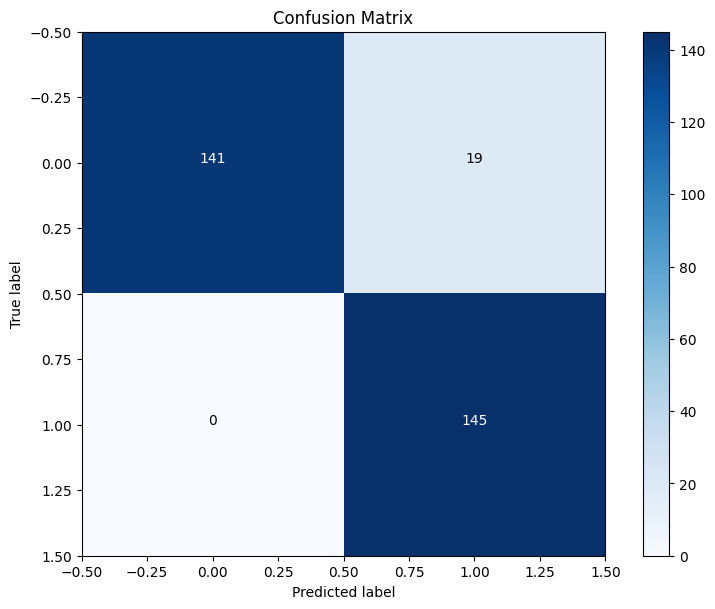

In [ ]:
# Import the necessary libraries
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import itertools
from imutils import paths
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.vgg16 import preprocess_input

# Define the path to the dataset
dataset_path = '/content/drive/MyDrive/Root Monitoring of Hydroponic Crop Plants/dataset'

# Load image paths
imagePaths = list(paths.list_images(dataset_path))

# Load the data
data = []
labels = []

# Process the 'hairy_root' and 'non_hairy_root' images
for img_path in imagePaths:
    data.append(img_path)
    label = os.path.basename(os.path.dirname(img_path))
    labels.append(label)

# Create a DataFrame
df = pd.DataFrame({'image_path': data, 'label': labels})

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define a function to load and preprocess the images
def load_and_preprocess_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    img = preprocess_input(img)
    return img

# Load and preprocess images for training
X_train = np.array([load_and_preprocess_image(img_path) for img_path in train_df['image_path']])
y_train = train_df['label']

# Load and preprocess images for testing
X_test = np.array([load_and_preprocess_image(img_path) for img_path in test_df['image_path']])
y_test = test_df['label']

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train an LDA model
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train.reshape(X_train.shape[0], -1), y_train_encoded)

# Predict on the test set
y_pred = lda_classifier.predict(X_test.reshape(X_test.shape[0], -1))

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
precision, recall, f1_score, support = precision_recall_fscore_support(y_test_encoded, y_pred, average='weighted')

# Print the classification report
classification_rep = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Support:", support)
print(classification_rep)

# Visualize confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > 0.5 * cm.max() else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = label_encoder.classes_
plot_confusion_matrix(y_test_encoded, y_pred, classes=class_names)
